# Titanic Problem 

### Getting the Data

In [210]:
import os
from zipfile import ZipFile
import urllib

DOWNLOAD_ROOT = "https://github.com/DoctorDatah/Titanic-Machine-Learning-from-Disaster-Kaggle/raw/master"
DOWNLOADING_PATH = "DataSets" # os.path.join("DataSets", "xxx")
DOWNLOAD_URL = DOWNLOAD_ROOT + "/raw/titanic.zip"

def fetch_titanic_data(downloading_path = DOWNLOADING_PATH, download_url = DOWNLOAD_URL):
    
    os.makedirs(downloading_path, exist_ok = True)
    zip_file_path = os.path.join(downloading_path,"titanic.zip")

    urllib.request.urlretrieve(download_url,zip_file_path)
    
    zip_file = ZipFile(zip_file_path)
    zip_file.extractall(path=downloading_path)
    zip_file.close()
    
fetch_titanic_data()

In [211]:
os.listdir("DataSets")

['gender_submission.csv', 'test.csv', 'titanic.zip', 'train.csv']

In [212]:
import pandas as pd 

def load_file_as_dataframe(file_name):
    csv_path = os.path.join(DOWNLOADING_PATH,file_name)
    return pd.read_csv(csv_path)

In [213]:
train = load_file_as_dataframe("train.csv")
submission_sample = load_file_as_dataframe("gender_submission.csv")

train.head(2)
submission_sample.head(2)

,PassengerId,Survived
0,892,0
1,893,1


### Quick  Look on the data

In [214]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Concern 1:** Age, Cabin and Embarked have Missing Values<br>
**Concern 2:** Some Features have not appropriate data type

In [215]:
### Checking Different Categorical Variables

In [216]:
train["Survived"].value_counts() # 549 : 342 = 61 : 38

0    549
1    342
Name: Survived, dtype: int64

In [217]:
train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [218]:
train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [219]:
train["SibSp"].value_counts() # of siblings / spouses aboard the Titanic
                              # Could possibly be be a categorical variables

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [220]:
train["Parch"].value_counts() # of parents / children aboard the Titanic

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [221]:
train["Cabin"].value_counts() # Cabin Number 
                              # Looks insignificant

B96 B98        4
G6             4
C23 C25 C27    4
F33            3
C22 C26        3
              ..
C50            1
E58            1
A10            1
D47            1
D56            1
Name: Cabin, Length: 147, dtype: int64

In [222]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [223]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Wells, Miss. Joan",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


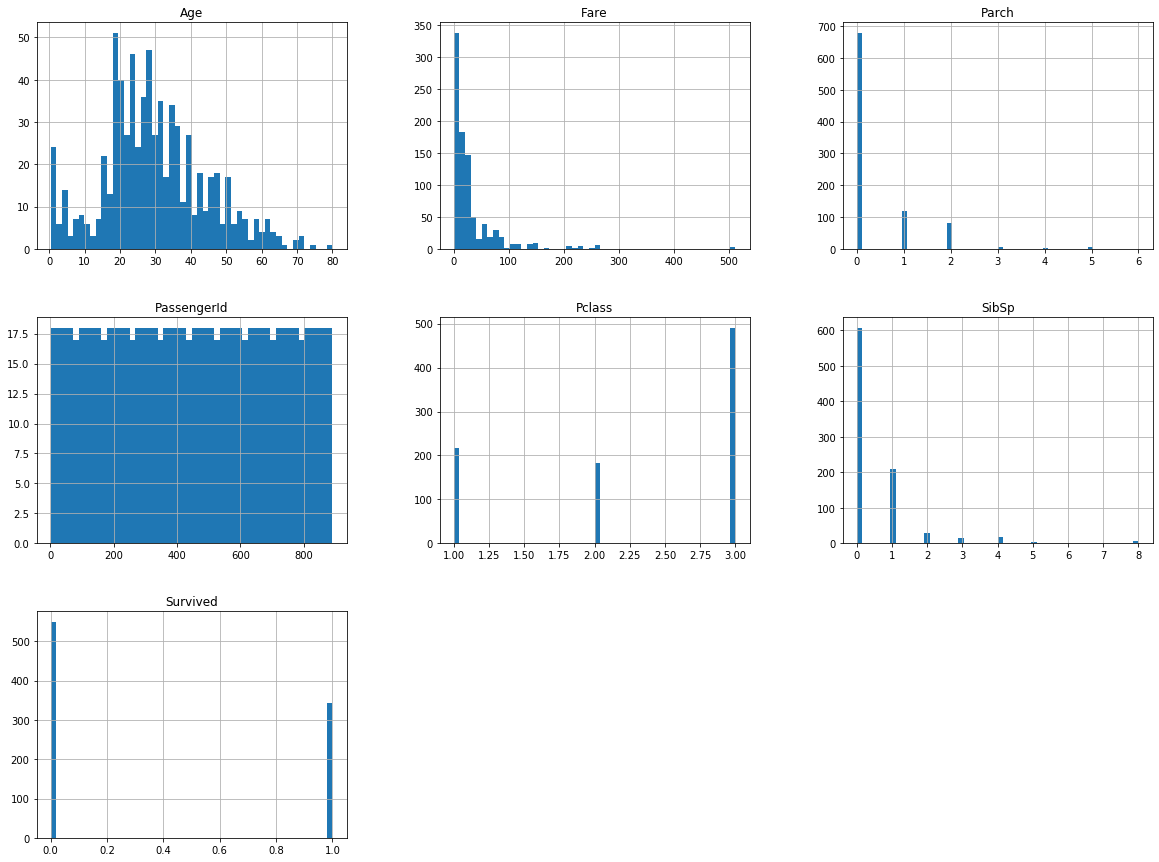

In [224]:
%matplotlib inline 
import matplotlib.pyplot as plt

train.hist(bins=50, figsize=(20,15))
plt.show()

In [225]:
# inspecting fare
# In histogram it might look fare is zero, but minimum is 32. However we can see the outliner here. 
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

### Train Test Split

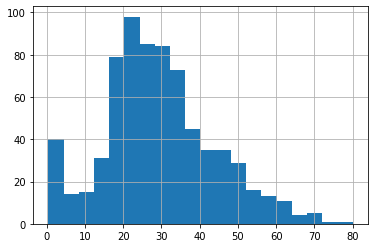

In [226]:
# Age could be very siginificant for Survival 
# So Lets Do Stratified Sampling Based on Aage
train['Age'].describe()
train["Age"].hist(bins = 20)

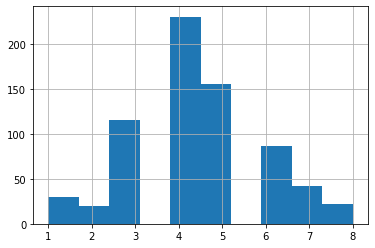

In [227]:
# Creating bins / Categories of 
import numpy as np
train['Age_category'] = pd.cut(train['Age'],
                               bins =[1,5,10,20,30,40,50,60,80],
                               labels=[1,2,3,4,5,6,7,8])
train['Age_category'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D56A25A5C8>,
      dtype=object)

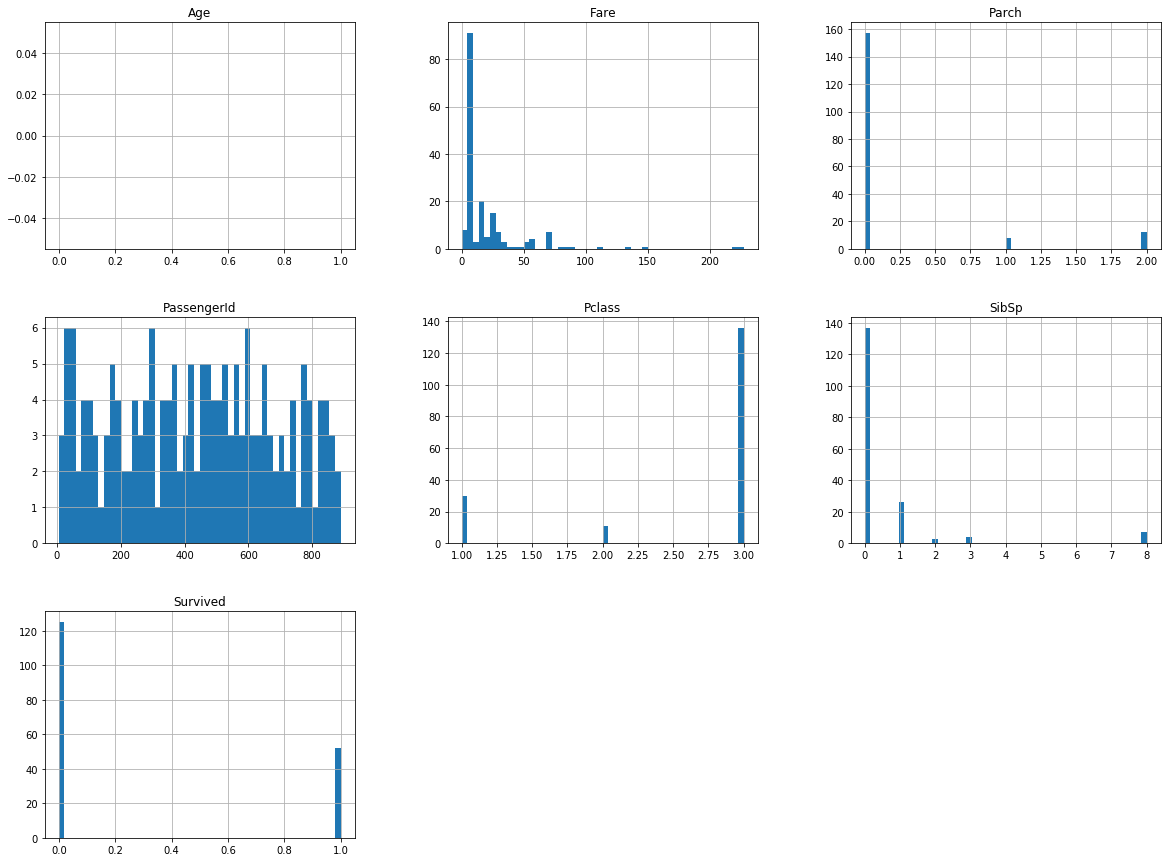

In [251]:
# Dealing with missing values of age first as Startified sampling requires non null values

# First we should check are there any specfic reason for null values (before decideing what to do with them)
train[train['Age'].isnull()].hist(bins = 50, figsize=(20,15) )
#train.dropna(subset=["Age_category"], inplace=True)

In [ ]:
# Fare seems very low for missing age values 
# (Could poosibly beacues of childern age may not be added, maybe all missing values are of childern)


In [181]:
from sklearn.model_selection import StratifiedShuffleSplit 

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=181)

for train_index, test_index in split.split(train,train["Age_category"]):
    strat_train_set = train.loc[train_index]
    strat_test_set = train.loc[test_index]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  import sys


In [182]:
strat_train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,350.757991,0.408676,2.187215,30.383562,0.506849,0.442922,34.029566
std,201.897806,0.492151,0.843129,14.353422,0.919506,0.874339,47.219325
min,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000
25%,180.750000,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,348.000000,0.000000,2.000000,29.000000,0.000000,0.000000,15.950000
75%,521.750000,1.000000,3.000000,38.000000,1.000000,1.000000,36.437500
max,700.000000,1.000000,3.000000,80.000000,5.000000,5.000000,512.329200
